In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def lbp(x):
    lbp_code = 0
    lbp_acu=0
    visit_list = [(0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0), (-1,-1)]
    for i in range(len(visit_list)):
        if (x[visit_list[i]] >= x[0,0]):
            lbp_acu = 2**i  
        else:
            lbp_acu = 0
        lbp_code = lbp_code +lbp_acu
    return lbp_code    
    
def lbp_filter(gray):
    lbp_texture = np.zeros( (gray.shape[0]-2,gray.shape[1]-2) )
    for iy in range(1,gray.shape[0]-1):
        for ix in range(1,gray.shape[1]-1):
            lbp_texture[iy-1,ix-1] = lbp(gray[iy-1:iy+2,ix-1:ix+2])

    return lbp_texture.astype(np.uint8)

In [3]:
import os
images = []
gray = []
for filename in os.listdir('imagenes/'):
    img =  cv.cvtColor(cv.imread(os.path.join('imagenes/',filename)), cv.COLOR_BGR2RGB)
    if img is not None:
        images.append(img)
        gr = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        gray.append(gr)



In [4]:
img_LBP = []

for i in range(len(gray)):
    img_LBP.append(lbp_filter(gray[i]))


In [5]:
histograma = []
for i in range(len(gray)):
    #n_bins = int(img_LBP[i].max() + 1)
    n_bins = 50
    hist, bins = np.histogram(img_LBP[i], density=True, bins=n_bins, range=(0, n_bins))
    histograma.append(hist)


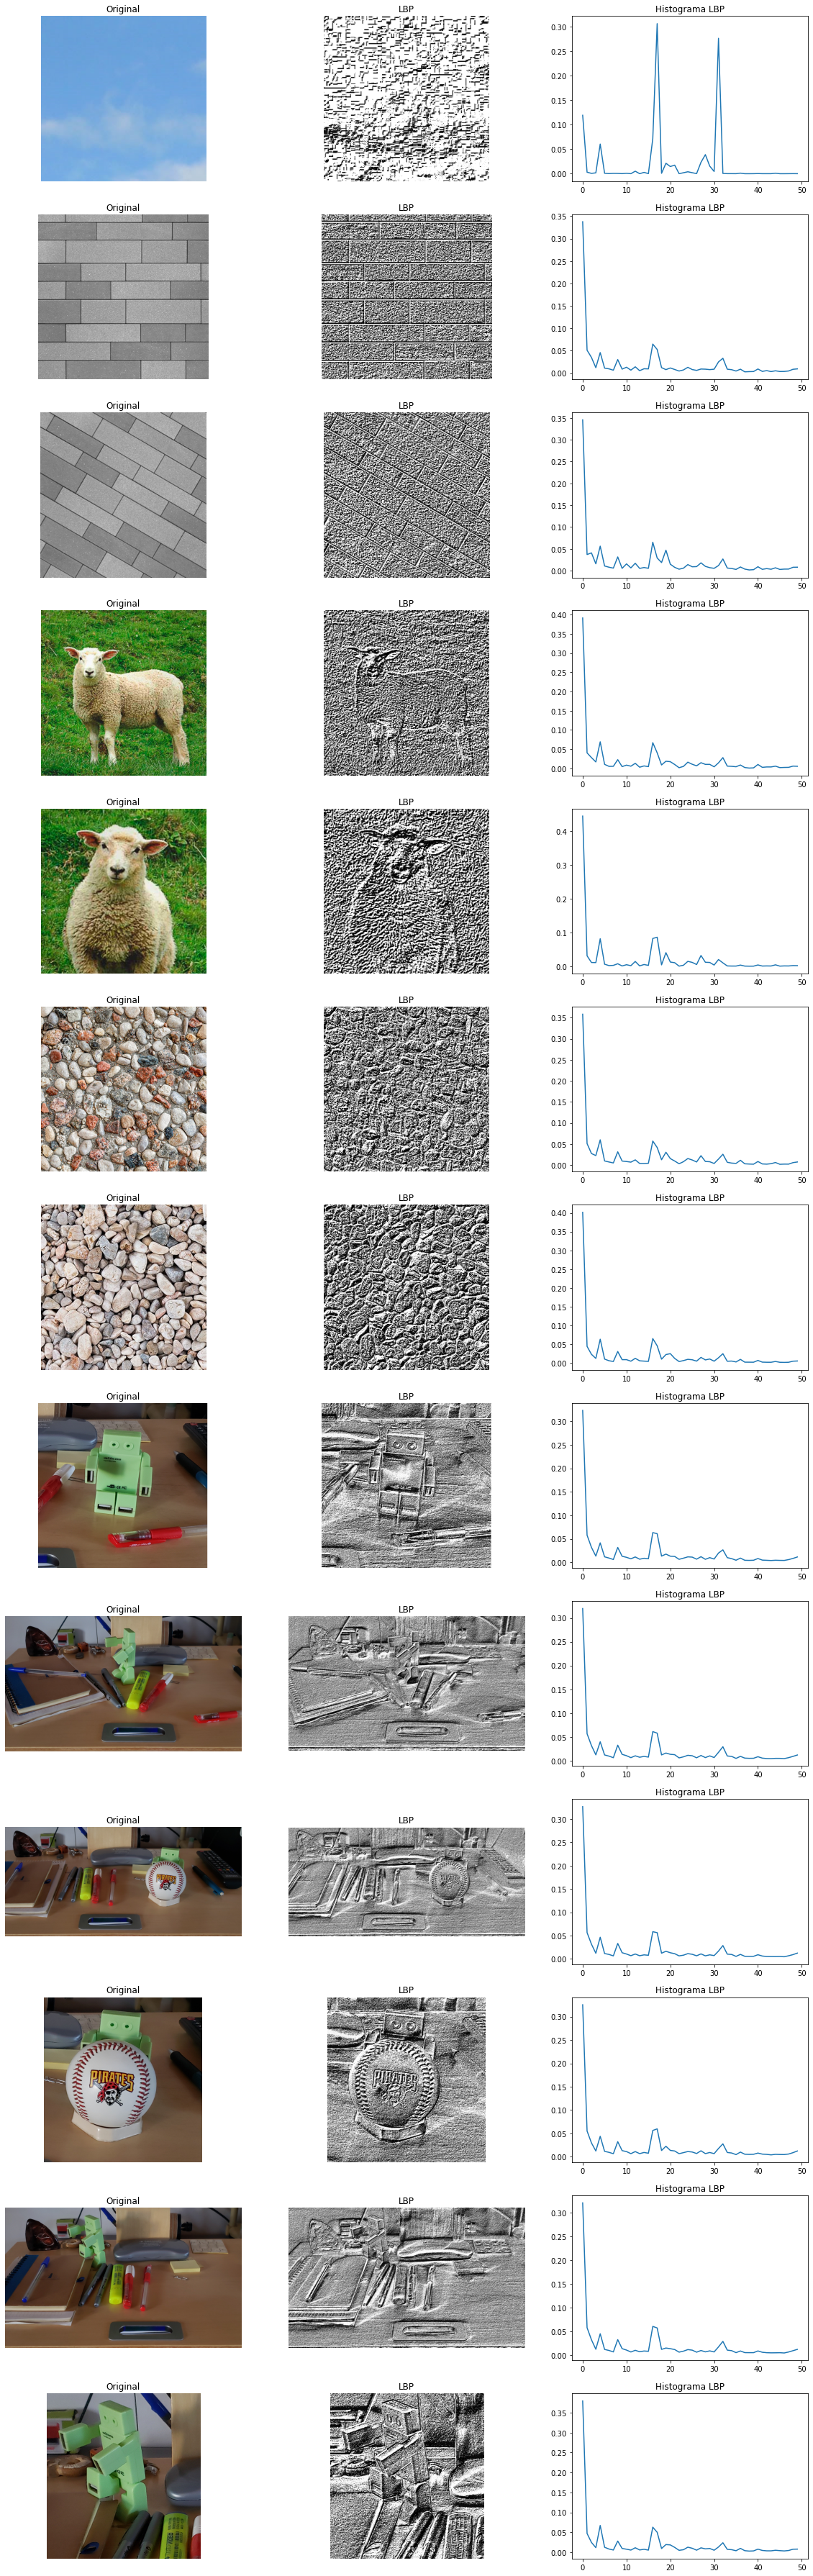

In [6]:

fig, ax = plt.subplots(len(gray),3,figsize=(20,5*len(gray)))
for i in range(len(gray)):

    ax[i][0].imshow(images[i])
    ax[i][0].set_title("Original")
    ax[i][0].axis('off')
    
    ax[i][1].imshow(img_LBP[i], cmap='gray')
    ax[i][1].set_title("LBP")
    ax[i][1].axis('off')

    ax[i][2].plot(histograma[i])
    ax[i][2].set_title("Histograma LBP")
    ax[i][2].axis('on')    

plt.show()


In [7]:
#comp = np.empty((13,13),int)

#for i in range(len(gray)):
#    for j in range(len(gray)):
#        comp[i,j] = cv.compareHist(cv.calcHist([gray[i]],[0],None,[60],[0,60]), cv.calcHist([gray[j]],[0],None,[60],[0,60]),method=cv.HISTCMP_CORREL)       
#print(comp)